In [249]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [250]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
0,1056,2,39.07
13,1100,2,40.00
12,1000,2,38.00
9,3700,5,167.00
15,1175,2,42.00


In [4]:
df["price"].values.reshape(df.shape[0],1).shape


(20, 1)

In [5]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x_scaled = sx.fit_transform(df.drop("price",axis=1))
y_scaled = sy.fit_transform(df["price"].values.reshape(df.shape[0],1))

print("Scaled X = \n",x_scaled)
print("Scaled Y = \n",y_scaled)

Scaled X = 
 [[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]
Scaled Y = 
 [[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


In [6]:
len(y_scaled)

20

#### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D


In [7]:
y_scaled = y_scaled.ravel()
y_scaled.shape

(20,)

In [8]:
x_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [151]:
def momentum_gradient_descent(x, y_true, epochs, learning_rate = 0.01 , gama = 0.6):
    num_features = x.shape[1]
    thetas = np.zeros(shape = (num_features))
    vt = np.zeros(shape= (num_features))
    Nobservations = x.shape[0]   # num of rows in X
    cost_list = []
    epochs_list = []
    theta_1 = []
    theta_2 = []
    hypothesis = []
    for i in range(epochs):
        
        # Calculate Y predected
        y_predict = np.dot( thetas , x.T )
        # Getting the gradient with current thetas values
        thetas_grad = (2/Nobservations)*(x.T.dot(y_predict - y_true))
        
        vt = (gama * vt) + ((1 - gama) * thetas_grad)
        # Updating thetas values
        thetas = thetas - (learning_rate * vt)
        # Calculate the cost value 
        cost = np.mean(np.square(y_predict - y_true))
        
        if i%10 == 0 :
            cost_list.append(cost)
            epochs_list.append(i)
            theta_1.append(thetas[0])
            theta_2.append(thetas[1])
            
    hypothesis.append(y_predict)
    
    return thetas, theta_1, theta_2, cost, cost_list, epochs_list, hypothesis
        
        


In [182]:
the_ta, the_ta_1, the_ta_2, cost, cost_list, epoch_list, Hypoth_esis= momentum_gradient_descent(x_scaled,y_scaled,300)
the_ta, cost


(array([0.5184358 , 0.42431068]), 0.009853637579590917)

In [183]:
Hypoth_esis

[array([0.15186911, 0.63999141, 0.32660757, 0.34107958, 0.17759712,
        0.17223712, 0.66357542, 0.76505812, 0.3033809 , 0.94265525,
        0.39092759, 0.67304476, 0.14186378, 0.15973045, 0.47132762,
        0.17313046, 0.28015422, 0.34447424, 0.56423432, 0.        ])]

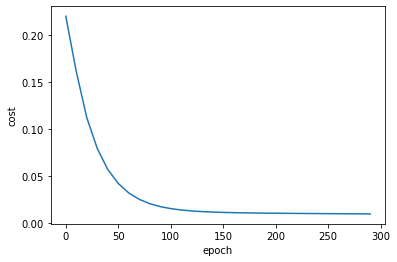

In [184]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

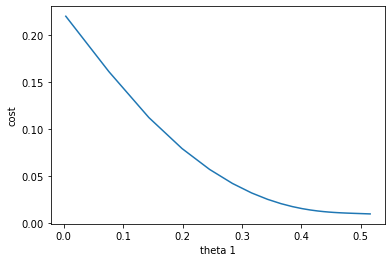

In [185]:

plt.xlabel("theta 1")
plt.ylabel("cost")
plt.plot(the_ta_1,cost_list)

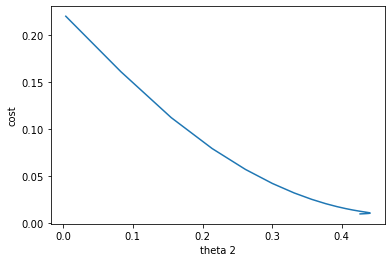

In [186]:

plt.xlabel("theta 2")
plt.ylabel("cost")
plt.plot(the_ta_2,cost_list)

In [187]:
def predict(area, bedroom, theta):
    
    scaled_x = sx.transform([[area,bedroom]])[0]
    scaled_price = theta[0]* scaled_x[0] + theta[1]* scaled_x[1]
    
    return sy.inverse_transform([[scaled_price]])
    

In [188]:
predict(2600,4,the_ta)

array([[118.40280113]])

## Getting prediction values using Hypothesis values 

In [189]:
y_hat = []
for i in Hypoth_esis:
    y_hat.append(sy.inverse_transform([i]))
    

In [190]:
# Check the 1D-dimention y_hat

y_hat[0][0]

array([ 52.50233044, 118.39884051,  76.09202202,  78.04574274,
        55.97561172,  55.25201146, 121.58268169, 135.28284674,
        72.95642087, 159.25845846,  84.77522523, 122.86104216,
        51.15160994,  53.56361083,  95.62922923,  55.3726115 ,
        69.82081971,  78.50402291, 108.17163386,  32.        ])

In [191]:
from sklearn.metrics import r2_score

r2_score(df.price, y_hat[0][0]) 

0.9012929535058143

# -> Momentum with NAG 

In [251]:
def momentum_NAG_gradient_descent(x, y_true, epochs, learning_rate = 0.03 , gama = 0.6):
    num_features = x.shape[1]
    thetas = np.zeros(shape = (num_features))
    vt = np.zeros(shape= (num_features))
    Nobservations = x.shape[0]   # num of rows in X
    cost_list = []
    epochs_list = []
    theta_1 = []
    theta_2 = []
    hypothesis = []
    for i in range(epochs):
        
        if i > 2 :
            if abs(cost_list[-2] - cost_list[-1]) <= 0.001 :
                break
            
        # Calculate Theta temp
        theta_tmp = thetas - (gama * vt)
        # Calculate Y predected
        y_predict = np.dot( theta_tmp , x.T )
        # Getting the gradient with current thetas values
        thetas_tmp_grad = (2/Nobservations)*(x.T.dot(y_predict - y_true))
        # Updating thetas values
        thetas = theta_tmp - (learning_rate * thetas_tmp_grad)
        # Calculate the Vt value 
        vt = (gama * vt) + ( learning_rate * thetas_tmp_grad)
        # Calculate the Cost value 
        cost = np.mean(np.square(y_predict - y_true))
        
        cost_list.append(cost)
        epochs_list.append(i)
        theta_1.append(thetas[0])
        theta_2.append(thetas[1])
        
        
            
    hypothesis.append(y_predict)
    
    return thetas, theta_1, theta_2, cost, cost_list, epochs_list, hypothesis
        
        


In [252]:
NAG_the_ta, NAG_the_ta_1, NAG_the_ta_2, NAG_cost, NAG_cost_list, NAG_epoch_list, NAG_Hypothesis= momentum_NAG_gradient_descent(x_scaled,y_scaled,200)
NAG_the_ta, NAG_cost


(array([0.39084971, 0.40071052]), 0.016752559301575775)

In [253]:
NAG_Hypothesis


[array([0.13399265, 0.5402029 , 0.28512949, 0.29597854, 0.15327986,
        0.14926169, 0.55788284, 0.63396013, 0.26771743, 0.78723999,
        0.33334749, 0.5649816 , 0.12649208, 0.13988597, 0.39361999,
        0.14993138, 0.25030538, 0.29852338, 0.46326822, 0.        ])]

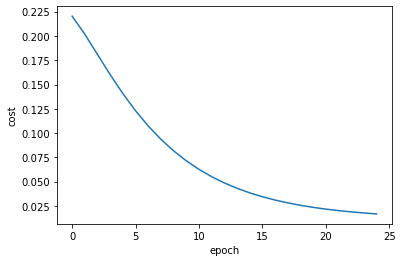

In [254]:

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(NAG_epoch_list,NAG_cost_list)


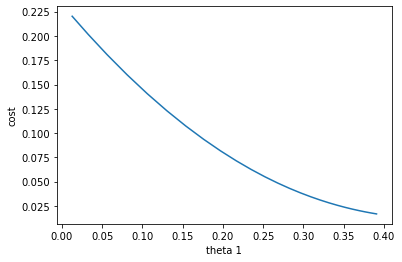

In [255]:

plt.xlabel("theta 1")
plt.ylabel("cost")
plt.plot(NAG_the_ta_1,NAG_cost_list)


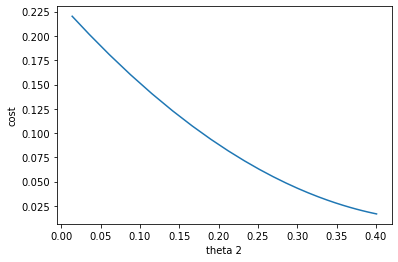

In [256]:

plt.xlabel("theta 2")
plt.ylabel("cost")
plt.plot(NAG_the_ta_2,NAG_cost_list)

In [257]:
def predict(area, bedroom, theta):
    
    scaled_x = sx.transform([[area,bedroom]])[0]
    scaled_price = theta[0]* scaled_x[0] + theta[1]* scaled_x[1]
    
    return sy.inverse_transform([[scaled_price]])
    

In [258]:
predict(1200,2,NAG_the_ta)

array([[52.80187132]])

## Getting prediction values using Hypothesis values 

In [259]:
y_hat_NAG = []
for i in Hypoth_esis:
    y_hat_NAG.append(sy.inverse_transform([i]))
    

In [260]:
# Check the 1D-dimention y_hat

y_hat_NAG[0][0]

array([ 52.50233044, 118.39884051,  76.09202202,  78.04574274,
        55.97561172,  55.25201146, 121.58268169, 135.28284674,
        72.95642087, 159.25845846,  84.77522523, 122.86104216,
        51.15160994,  53.56361083,  95.62922923,  55.3726115 ,
        69.82081971,  78.50402291, 108.17163386,  32.        ])

In [261]:

r2_score(df.price, y_hat_NAG[0][0]) 

0.9012929535058143